In [252]:
import os
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


In [242]:
from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width: 95% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

%matplotlib notebook

In [208]:
velodyne_data_path = './2011_09_26_drive_0106_sync/2011_09_26/2011_09_26_drive_0106_sync/velodyne_points/data' 

In [35]:
data_path = r'C:\noy\academics\autonomous driving\proj1\2011_09_26_drive_0106_sync\2011_09_26\2011_09_26_drive_0106_sync'

In [29]:
os.listdir(data_path + '\oxts')

['data', 'dataformat.txt', 'timestamps.txt']

In [223]:
def read_velodyne_points(path):
    velodyne_data_filles = os.listdir(path)
    data_points = []
    for data_file in velodyne_data_filles:
        f = open(path + '\\' + data_file, "rb")
        data = np.fromfile(f, np.float32)
        data.shape = (-1, 4)
        data_points.append(data)
#         data_points[data_file] = data
        f.close()
        
    return data_points

velo_points = read_velodyne_points(velodyne_data_path)

In [232]:
velo_points[0][:,-1]

array([0.  , 0.  , 0.  , ..., 0.71, 0.  , 0.  ], dtype=float32)

In [240]:
[xs, ys, zs] = velo_points[0][velo_points[0][:, 3] != 0][:, 0:3].T

<IPython.core.display.Javascript object>


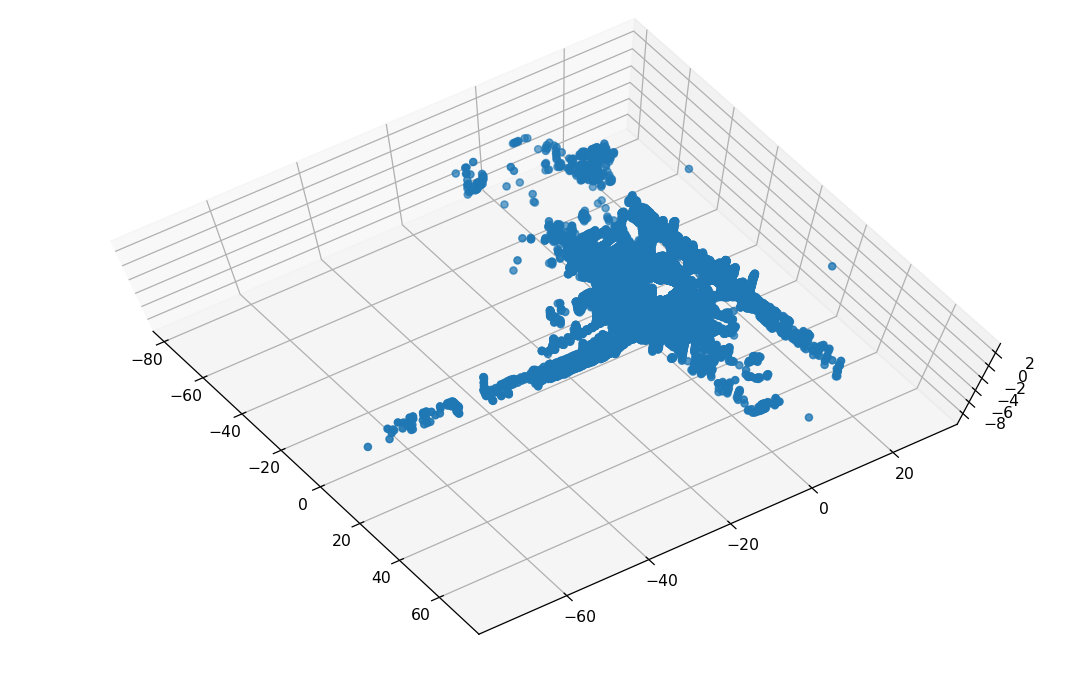

In [255]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs, ys, zs)

<IPython.core.display.Javascript object>


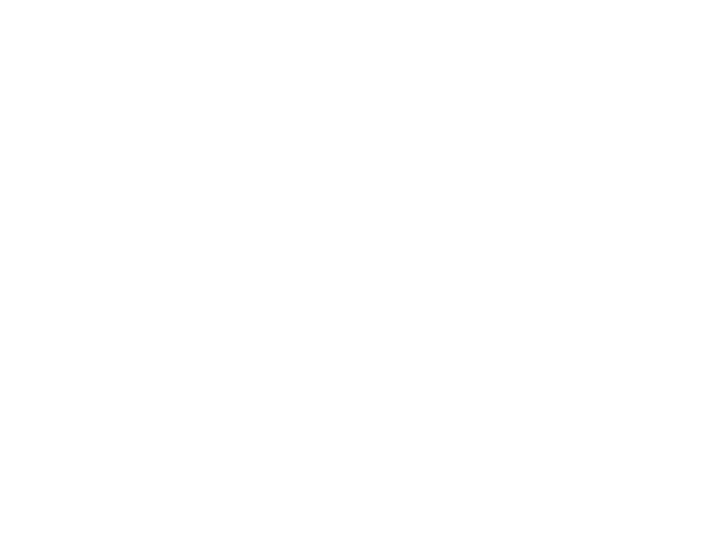

AttributeError: 'NoneType' object has no attribute 'scatter'

In [247]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


In [224]:
def initialize(data_path):
    oxt_data_keys = ['lat', 'lon', 'alt', 'roll', 'pitch', 'yaw', 'vn', 'vf', 'vl', 'vu', 'ax', 'ay', 'af', 'al', 'au', 'wx', 'wy', 'wz',
                    'wf', 'wl', 'wu', 'pos_accuracy', 'vel_accuracy', 'navstat', 'numsats', 'posmode', 'velmode', 'orimode']
    # reading oxts
    oxts_files = os.listdir(data_path + '\oxts')
    oxts_times_file = data_path + '\\oxts\\timestamps.txt'
    oxts_data_path = data_path + '\\oxts\\data\\'
    oxts_data_format = data_path + '\\oxts\\dataformat.txt'
    oxts_times = []
    with open(oxts_times_file) as f:
        line = f.readline()[0:-4]
        oxts_times.append(datetime.strptime(line, '%Y-%m-%d %H:%M:%S.%f'))
        while line:
            line = f.readline()[0:-4]
            if line:
                oxts_times.append(datetime.strptime(line, '%Y-%m-%d %H:%M:%S.%f'))
                
        
    oxts_data_points = pd.DataFrame()
    data_dict = {}
    for data_file in os.listdir(oxts_data_path):
        with open(oxts_data_path + '\\' + data_file) as f:
            data_line = f.readline()
            broken_line = data_line.split(' ')
            
            for key in oxt_data_keys:
                if key not in data_dict.keys():
                    data_dict[key] = [broken_line.pop(0)]
                    
                else:
                    data_dict[key].append(broken_line.pop(0))
        
    data = pd.DataFrame(index=oxts_times, data=data_dict)
    data['velodyne_points'] = read_velodyne_points(data_path  + '\\velodyne_points\\data')

    return data

In [258]:
data = initialize(data_path)
pd.set_option('display.max_rows', data.shape[0]+1)
print(data)

                                        lat              lon              alt  \
2011-09-26 15:31:58.449913  49.009947690751  8.4234877923254  113.96620178223   
2011-09-26 15:31:58.559662  49.009947688656  8.4234878982758  113.96188354492   
2011-09-26 15:31:58.659817  49.009947649291  8.4234880029254  113.95798492432   
2011-09-26 15:31:58.769745  49.009947593119  8.4234881202934  113.95337677002   
2011-09-26 15:31:58.869726   49.00994755444  8.4234882279448  113.94908905029   
2011-09-26 15:31:58.969737  49.009947520729  8.4234883374169  113.94508361816   
2011-09-26 15:31:59.069735  49.009947475145  8.4234884509702  113.94068908691   
2011-09-26 15:31:59.179974  49.009947426586  8.4234885778529  113.93585205078   
2011-09-26 15:31:59.279731   49.00994738438  8.4234886951428  113.93171691895   
2011-09-26 15:31:59.379744  49.009947341899  8.4234888151335  113.92736816406   
2011-09-26 15:31:59.489763  49.009947315959  8.4234889466211  113.92183685303   
2011-09-26 15:31:59.589748  

In [263]:
np.array((data['velodyne_points']))

(227,)

In [192]:
f = open(r'C:\noy\academics\autonomous driving\proj1\2011_09_26_drive_0106_sync\2011_09_26\2011_09_26_drive_0106_sync\oxts\timestamps.txt')
lines = f.readlines()
print(len(lines))

227


In [165]:
pd.DataFrame()

""


In [170]:
oxt_data_keys = ['lat', 'lon', 'alt', 'roll', 'pitch', 'yaw', 'vn', 'vf', 'vl', 'vu', 'ax', 'ay', 'af', 'al', 'au', 'wx', 'wy', 'wz',
'wf', 'wl', 'wu', 'pos_accuracy', 'vel_accuracy', 'navstat', 'numsats', 'posmode', 'velmode', 'orimode']

In [135]:
print(oxts_times[-1] - oxts_times[-2])

-1 day, 23:59:59.890043315


In [72]:
s = '2011-09-26 15:31:58.449913777'
s[-3:]

'777'

In [74]:
class ns_datetime:
    def __init__(self, str_time):
        self.nanoseconds = int(str_time[-3:])
        self.date_time = datetime.strptime(str_time[:-3], '%Y-%m-%d %H:%M:%S.%f')
        
    def __add__(self, other):
        pass
    
    def __sub__(self, other):
        pass

In [25]:
f=open (datavelodyne_points\data\0000000000.bin', "rb")
data = np.fromfile(f, np.float32)
data.shape = (-1, 4)
f.close()

[[52.301  7.3    1.995  0.12 ]
 [50.572  7.22   1.937  0.   ]
 [48.788  7.277  1.877  0.   ]
 ...
 [ 3.717 -1.399 -1.736  0.41 ]
 [ 3.592 -1.338 -1.671  0.   ]
 [ 3.756 -1.387 -1.751  0.   ]]


In [27]:
data.shape

(119977, 4)

In [214]:


class nano_time_data:
    def __init__(self, date_time_delta, nano_delta):
        self.nano_delta = nano_delta
        self.date_time_delta = date_time_delta
        
    def __str__(self):
        return str(self.date_time_delta) + str(self.nano_delta)
    
    def __repr__(self):
        return str(self.date_time_delta) + str(self.nano_delta)
    
        
class ns_datetime:
    def __init__(self, date_time, nano):
        self.nano = nano
        self.date_time = date_time
        
    @staticmethod
    def from_string(str_time):
        nano = int(str_time[-3:])
        date_time = datetime.strptime(str_time[:-3], '%Y-%m-%d %H:%M:%S.%f')
        return ns_datetime(date_time, nano)
    
    def __add__(self, other):
        pass
    
    def __sub__(self, other):
        datetime_diff = self.date_time - other.date_time
        nano_diff =  self.nano -other.nano
        if nano_diff < 0:
            nano_diff = nano_diff + 1000
            datetime_diff = datetime_diff + timedelta(microseconds=1)
            
        return nano_time_data(datetime_diff, nano_diff)
    
    def __cmp__(self, other):
        return (self.date_time == other.datetime & self.nano == other.nano)
    
    def __str__(self):
        return str(self.date_time) + str(self.nano)
    
    def __rper__(self):
        str(self.date_time) + str(self.nano)
    

